In [1]:
!pip install --upgrade --no-cache-dir gdown
!pip install contractions
!gdown --id 1Q2RhQA14AKNwxAfv1PuRsPS80sqtcX-H #utils
!gdown --id 1_so3eGJ4l_Td1TWjuVlSRIKfFLezB6r1 #network
!gdown --id 1aUVV3f4-ftU1hhoXLRiOf0LJ7SLEG7_r #dataset
!gdown --id 1yVfLxAPubn-b4ZWnKX9-lvnXT6OzmGCt #text free images
!gdown --id 1XfV8pVN39Rwl--2wI2rQ1paZSV4N1VsY #Glove
!gdown --id 1cQnxpWJwSUitkzX5mOiNpuF33poY2mR- #Annotation File

     |████████████████████████████████| 287 kB 4.2 MB/s 
     |████████████████████████████████| 106 kB 87.0 MB/s 
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Q2RhQA14AKNwxAfv1PuRsPS80sqtcX-H
To: /content/utils_glove.py
100% 2.33k/2.33k [00:00<00:00, 4.55MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1_so3eGJ4l_Td1TWjuVlSRIKfFLezB6r1
To: /content/network_glove.py
100% 4.31k/4.31k [00:00<00:00, 6.33MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and wil

In [2]:
#Load model
from google.colab import drive
import shutil
def save_model(model):
  #Saving the best model to drive
  drive.mount('/content/drive')
  shutil.copy("/content/" + model, "/content/drive/MyDrive/Dl thesis/model")
  print("Model Saved")
  drive.flush_and_unmount()

def load_model(model):
  drive.mount('/content/drive')
  shutil.copy("/content/drive/MyDrive/Dl thesis/model/" + model, '/content/')
  print("Model Loaded")
  drive.flush_and_unmount()

In [3]:
!ls
!unzip annotation_file.zip
!unzip Glove.zip
!unzip text_free_images.zip

Streaming output truncated to the last 5000 lines.
  inflating: text_free_images/memes_1615.png  
  inflating: __MACOSX/text_free_images/._memes_1615.png  
  inflating: text_free_images/covid_memes_3086.png  
  inflating: __MACOSX/text_free_images/._covid_memes_3086.png  
  inflating: text_free_images/memes_3764.png  
  inflating: __MACOSX/text_free_images/._memes_3764.png  
  inflating: text_free_images/covid_memes_3938.png  
  inflating: __MACOSX/text_free_images/._covid_memes_3938.png  
  inflating: text_free_images/memes_1173.png  
  inflating: __MACOSX/text_free_images/._memes_1173.png  
  inflating: text_free_images/memes_847.png  
  inflating: __MACOSX/text_free_images/._memes_847.png  
  inflating: text_free_images/memes_1167.png  
  inflating: __MACOSX/text_free_images/._memes_1167.png  
  inflating: text_free_images/memes_6608.png  
  inflating: __MACOSX/text_free_images/._memes_6608.png  
  inflating: text_free_images/memes_853.png  
  inflating: __MACOSX/text_free_images/._

In [4]:
!mv text_free_images Images
!ls

annotation_file      Glove	__MACOSX	  text_free_images.zip
annotation_file.zip  Glove.zip	network_glove.py  utils_glove.py
dataset_glove.py     Images	sample_data


In [5]:
!pip install transformers
import os
import torch
import numpy as np
from utils_glove import *
from network_glove import *
from dataset_glove import *
from torch.optim import Adam
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

     |████████████████████████████████| 4.0 MB 4.1 MB/s 
     |████████████████████████████████| 895 kB 83.6 MB/s 
     |████████████████████████████████| 596 kB 70.0 MB/s 
     |████████████████████████████████| 6.6 MB 68.9 MB/s 
     |████████████████████████████████| 77 kB 9.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Using cuda device


Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [6]:
train_df = pd.read_csv("./annotation_file/train.csv")
train_df
train_df['Role'] = train_df['Role'].map({'hero' : 0, 'villain' : 1, 'victim' : 2, 'other' : 3})
train_df

,Name,Text,Entity,Role
0,covid_memes_252.png,kwai\ngkwa 0964\n#nnevvy\napplause to Thais fr...,thais,0
1,covid_memes_20.png,best candidate for\nJA\n2020\njoe biden\nKamal...,joe biden,0
2,covid_memes_60.png,MASK\nTRUMP\nTRUMP\nDEN CE\nHelp your child fi...,donald trump,0
3,covid_memes_493.png,BARACK OBAMA PRESENTS\nA MEDAL TO HIMSELF.\nFO...,barack obama,0
4,covid_memes_321.png,*New Swine flu like virus with\nhuman pandemic...,china,0
...,...,...,...,...
17523,memes_982.png,Biden-Obama\nMemes\n300. Funny & Hillarious\nM...,biden obama meme,3
17524,memes_982.png,Biden-Obama\nMemes\n300. Funny & Hillarious\nM...,john robinson,3
17525,memes_982.png,Biden-Obama\nMemes\n300. Funny & Hillarious\nM...,memes,3
17526,memes_982.png,Biden-Obama\nMemes\n300. Funny & Hillarious\nM...,joe biden,3


In [7]:
labels, count = np.unique(train_df['Role'], return_counts = True)
print(labels, count)
class_weights = [sum(count)/ c for c in count ]
class_weights

[0 1 2 3] [  471  2441   903 13713]


[37.21443736730361, 7.180663662433429, 19.410852713178294, 1.278203164880041]

In [8]:
example_weights = [class_weights[e] for e in train_df['Role']]

In [9]:
sampler = torch.utils.data.WeightedRandomSampler(example_weights, 9000)

In [10]:
roletolabel = {'hero' : 0, 'villain' : 1, 'victim' : 2, 'other' : 3}
path = "./Glove/glove.6B.100d.txt"
vocab , embeddings_np = embedding(path)

In [11]:
metric_df = pd.DataFrame(columns = ['Train Loss', 'Validation Loss', 'Train Accuracy', 'Validation Accuracy', 'Train Weighted F1', 'Validation Weighted F1', 'Train Macro F1', 'Validation Macro F1'])

In [12]:
transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])

dataset = Custom(r"Images", r"./annotation_file/train.csv", vocab, transform, freq_threshold = 3, roletolabel = roletolabel)
pad_idx = dataset.vocab.stoi["<PAD>"]

train_loader = DataLoader(dataset=dataset, batch_size = 32, num_workers = 0, shuffle=False, pin_memory=True, 
                    collate_fn = MyCollate(pad_idx = pad_idx), drop_last = False,sampler=sampler)

In [13]:
dataset = Custom(r"Images", r"./annotation_file/val.csv", vocab, transform, freq_threshold = 3, roletolabel = roletolabel)
pad_idx = dataset.vocab.stoi["<PAD>"]

val_loader = DataLoader(dataset=dataset, batch_size = 32, num_workers = 0, shuffle=True, pin_memory=True, 
                    collate_fn = MyCollate(pad_idx = pad_idx), drop_last = False)

In [14]:
print(len(train_loader.dataset), len(val_loader.dataset))
print(len(train_loader), len(val_loader))

17528 2075
250 65


In [15]:
load_model(f"attention_model_latest_epoch.pth")
load_model(f"final_attention_model.pth")

Mounted at /content/drive
Model Loaded
Mounted at /content/drive
Model Loaded


In [ ]:
!ls -lrth

total 1.2G
drwxr-xr-x 2 root root 4.0K Apr  4 14:58 Glove
drwxr-xr-x 2 root root 256K Apr 10 10:14 Images
drwxr-xr-x 2 root root 4.0K Apr 10 12:09 annotation_file
drwxr-xr-x 1 root root 4.0K Apr 19 14:23 sample_data
-rw-r--r-- 1 root root 3.4K Apr 23 18:50 utils.py
-rw-r--r-- 1 root root  12K Apr 23 18:50 network.py
-rw-r--r-- 1 root root 9.1K Apr 23 18:50 dataset.py
-rw-r--r-- 1 root root 1.1G Apr 23 18:50 text_free_images.zip
-rw-r--r-- 1 root root 130M Apr 23 18:50 Glove.zip
-rw-r--r-- 1 root root 707K Apr 23 18:51 annotation_file.zip
drwxr-xr-x 4 root root 4.0K Apr 23 18:51 __MACOSX
drwxr-xr-x 2 root root 4.0K Apr 23 18:51 __pycache__
drwx------ 6 root root 4.0K Apr 23 18:54 drive


<h2>Training

In [16]:
ocr_encoder = ocr_Encoder(no_layers = 2, dropout = 0.2, embs_weight = embeddings_np)
entity_encoder = entity_Encoder(no_layers = 2, dropout = 0.2, embs_weight = embeddings_np)
model = Model(ocr_encoder, entity_encoder, no_of_classes = 4).to(device)

if(os.path.exists(f"./attention_model_latest_epoch.pth")):
    model.load_state_dict(torch.load(f'./attention_model_latest_epoch.pth'))
    print("Pretrained model Loaded")

Pretrained model Loaded


In [17]:
from torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-4)

In [18]:
from tqdm import tqdm

In [ ]:
train_error = []
val_error = []
val_f1 = []
train_f1 = []
min_val_f1 = -1*np.inf

for epoch in range(15):
    drive.mount('/content/drive')
    if(os.path.exists("/content/drive/MyDrive/Dl thesis/model/metric.csv")):
      load_model("metric.csv")
      metric_df = pd.read_csv("metric.csv")
    drive.flush_and_unmount()
    train_loss= 0 
    for (text, image, entity, role) in tqdm(train_loader):
        model.train()
        text = text.to(device = device, dtype = torch.int32)
        role = role.to(device = device, dtype = torch.int64)
        entity = entity.to(device = device, dtype = torch.int32)  
        feature = vgg(image.to(device = device, dtype = torch.float32))
        feature = torch.flatten(feature, start_dim=2)
        feature = feature.permute(0, 2, 1)
        y_pred = model(text, entity, feature)  
        optimizer.zero_grad()       

        loss = criterion(y_pred, role)
        train_loss += loss.item()
    
        loss.backward()
        optimizer.step()
        
    # Saving State Dict
    torch.save(model.state_dict(), f'./attention_model_latest_epoch.pth')  
    print("Training done for epoch : ", epoch+1)
    save_model(f"attention_model_latest_epoch.pth")
    
#   Checking Validation 
    model.eval()
    val_acc = 0
    val_loss = 0
    with torch.no_grad():            
        for (text, image, entity, role) in tqdm(val_loader):
            text = text.to(device=device, dtype = torch.int32)
            entity = entity.to(device=device, dtype = torch.int32)
            role = role.to(device=device, dtype = torch.int64)
            feature = vgg(image.to(device = device, dtype = torch.float32))
            feature = torch.flatten(feature, start_dim=2)
            feature = feature.permute(0, 2, 1)
            y_pred = model(text, entity, feature)                 
            loss = criterion(y_pred, role)       
            val_loss += loss.item()
                
    acc_train, macro_train, weighted_train = score(model,vgg, train_loader, device) 
    acc_val, macro_val, weighted_val = score(model,vgg, val_loader, device)
    print(f"\nEpoch {epoch+1}")
    print(f'Training Loss: {(train_loss/len(train_loader)):4f} -----> Training Accuracy: {acc_train:.4f} %, Training F1 Score : {macro_train:.4f}')  
    print(f"Validation Loss: {(val_loss/len(val_loader)):.4f} -----> Validation Accuracy: {acc_val:.4f} %, Validation F1 Score : {macro_val:.4f}")
    train_error.append(train_loss/len(train_loader))
    val_error.append(val_loss/len(val_loader))  
    val_f1.append(macro_val)
    train_f1.append(macro_train)

    metric_df = metric_df.append({'Train Loss' : train_loss/len(train_loader), 'Validation Loss' : val_loss/len(val_loader), 
                              'Train Accuracy' : acc_train, 'Validation Accuracy' : acc_val,
                              'Train Weighted F1' : weighted_train, 'Validation Weighted F1' : weighted_val, 
                              'Train Macro F1' : macro_train, 'Validation Macro F1' : macro_val}, 
                ignore_index = True)
    
    metric_df.to_csv("metric.csv", index = False)

    save_model("metric.csv")
     
    if min_val_f1 <= macro_val:
        print(f'Validation Macro f1 Increased({min_val_f1:.4f} ---> {macro_val:.4f}) \t Saving The Model')
        min_val_f1 = macro_val
        
        # Saving State Dict
        torch.save(model.state_dict(), f'./final_attention_model.pth')
        save_model(f"final_attention_model.pth")

    print("Epoch done : ", epoch+1)
    

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


100%|██████████| 250/250 [02:01<00:00,  2.07it/s]


Training done for epoch :  1
Mounted at /content/drive
Model Saved


100%|██████████| 65/65 [00:26<00:00,  2.48it/s]


[[1136   72  311  500]
 [ 576  189  461  685]
 [ 587   98  670  672]
 [ 575  134  384  950]]
[[ 16   5  10  23]
 [ 88  27  74 118]
 [ 37   9  38  37]
 [504 103 305 681]]

Epoch 1
Training Loss: 3.708116 -----> Training Accuracy: 36.8125 %, Training F1 Score : 0.3403
Validation Loss: 2.7570 -----> Validation Accuracy: 36.7229 %, Validation F1 Score : 0.2149
Mounted at /content/drive
Model Saved
Validation Macro f1 Increased(-inf ---> 0.2149) 	 Saving The Model
Mounted at /content/drive
Model Saved
Epoch done :  1
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


100%|██████████| 250/250 [02:01<00:00,  2.07it/s]


Training done for epoch :  2
Mounted at /content/drive
Model Saved


100%|██████████| 65/65 [00:25<00:00,  2.51it/s]


[[ 729  411   80  839]
 [ 195  667  176  977]
 [ 207  489  366  938]
 [ 211  463  149 1103]]
[[  5  12   4  33]
 [ 38  80  36 153]
 [ 20  27  18  56]
 [209 354 130 900]]

Epoch 2
Training Loss: 2.290951 -----> Training Accuracy: 35.8125 %, Training F1 Score : 0.3510
Validation Loss: 1.7443 -----> Validation Accuracy: 48.3373 %, Validation F1 Score : 0.2526
Mounted at /content/drive
Model Saved
Validation Macro f1 Increased(0.2149 ---> 0.2526) 	 Saving The Model
Mounted at /content/drive
Model Saved
Epoch done :  2
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


100%|██████████| 250/250 [02:00<00:00,  2.07it/s]


Training done for epoch :  3
Mounted at /content/drive
Model Saved


100%|██████████| 65/65 [00:26<00:00,  2.47it/s]


[[1038   53  241  633]
 [ 281  221  604  902]
 [ 157  108  953  800]
 [ 274  153  395 1187]]
[[ 13   4  11  26]
 [ 43  33  93 138]
 [ 17  14  42  48]
 [277 162 308 846]]

Epoch 3
Training Loss: 1.788706 -----> Training Accuracy: 42.4875 %, Training F1 Score : 0.4036
Validation Loss: 1.7979 -----> Validation Accuracy: 45.0120 %, Validation F1 Score : 0.2439
Mounted at /content/drive
Model Saved
Epoch done :  3
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


100%|██████████| 250/250 [02:01<00:00,  2.06it/s]


Training done for epoch :  4
Mounted at /content/drive
Model Saved


100%|██████████| 65/65 [00:26<00:00,  2.47it/s]


[[1498   17   86  406]
 [ 550  166  298 1000]
 [ 405   56  540 1006]
 [ 448   66  173 1285]]
[[ 17   2  13  22]
 [ 74  23  52 158]
 [ 25  12  30  54]
 [359  88 182 964]]

Epoch 4
Training Loss: 1.560043 -----> Training Accuracy: 43.6125 %, Training F1 Score : 0.3887
Validation Loss: 1.6874 -----> Validation Accuracy: 49.8313 %, Validation F1 Score : 0.2531
Mounted at /content/drive
Model Saved
Validation Macro f1 Increased(0.2526 ---> 0.2531) 	 Saving The Model
Mounted at /content/drive
Model Saved
Epoch done :  4
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


100%|██████████| 250/250 [02:01<00:00,  2.05it/s]


Training done for epoch :  5
Mounted at /content/drive
Model Saved


100%|██████████| 65/65 [00:26<00:00,  2.45it/s]


[[1064  150   35  740]
 [ 232  558  185  976]
 [ 192  363  520  955]
 [ 202  311  156 1361]]
[[ 11  13   2  28]
 [ 40  80  29 158]
 [ 12  32  19  58]
 [223 271 152 947]]

Epoch 5
Training Loss: 1.364897 -----> Training Accuracy: 43.7875 %, Training F1 Score : 0.4294
Validation Loss: 1.4183 -----> Validation Accuracy: 50.9398 %, Validation F1 Score : 0.2726
Mounted at /content/drive
Model Saved
Validation Macro f1 Increased(0.2531 ---> 0.2726) 	 Saving The Model
Mounted at /content/drive
Model Saved
Epoch done :  5
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


100%|██████████| 250/250 [01:55<00:00,  2.16it/s]


Training done for epoch :  6
Mounted at /content/drive
Model Saved


100%|██████████| 65/65 [00:25<00:00,  2.56it/s]


[[1547  374   78   18]
 [ 261 1292  296  102]
 [ 237  946  776   49]
 [ 329 1017  355  323]]
[[ 19  28   4   3]
 [ 57 170  50  30]
 [ 20  56  31  14]
 [324 767 309 193]]

Epoch 6
Training Loss: 1.292757 -----> Training Accuracy: 49.2250 %, Training F1 Score : 0.4666
Validation Loss: 2.5549 -----> Validation Accuracy: 19.9036 %, Validation F1 Score : 0.1668
Mounted at /content/drive
Model Saved
Epoch done :  6
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


100%|██████████| 250/250 [01:54<00:00,  2.17it/s]


Training done for epoch :  7
Mounted at /content/drive
Model Saved


100%|██████████| 65/65 [00:25<00:00,  2.55it/s]


[[ 917  189  259  592]
 [  90  616  618  692]
 [  49  236 1267  476]
 [  87  297  490 1125]]
[[ 11   8  12  23]
 [ 22  68  96 121]
 [  5  28  46  42]
 [116 295 402 780]]

Epoch 7
Training Loss: 1.244073 -----> Training Accuracy: 49.0625 %, Training F1 Score : 0.4908
Validation Loss: 1.4531 -----> Validation Accuracy: 43.6145 %, Validation F1 Score : 0.2610
Mounted at /content/drive
Model Saved
Epoch done :  7
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


100%|██████████| 250/250 [01:55<00:00,  2.16it/s]


Training done for epoch :  8
Mounted at /content/drive
Model Saved


100%|██████████| 65/65 [00:25<00:00,  2.55it/s]


[[1924  149   19   31]
 [ 370 1156  182  284]
 [ 287  807  601  262]
 [ 397  632  195  704]]
[[ 23  17   7   7]
 [ 66 137  37  67]
 [ 26  49  21  25]
 [391 601 143 458]]

Epoch 8
Training Loss: 1.217352 -----> Training Accuracy: 54.8125 %, Training F1 Score : 0.5221
Validation Loss: 1.9231 -----> Validation Accuracy: 30.7952 %, Validation F1 Score : 0.2206
Mounted at /content/drive
Model Saved
Epoch done :  8
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


100%|██████████| 250/250 [01:55<00:00,  2.16it/s]


Training done for epoch :  9
Mounted at /content/drive
Model Saved


100%|██████████| 65/65 [00:25<00:00,  2.56it/s]


[[1579  163  159   57]
 [ 177  945  477  301]
 [  78  539 1231  203]
 [ 289  569  509  724]]
[[ 17  18  13   6]
 [ 47 130  77  53]
 [ 20  40  41  20]
 [258 521 401 413]]

Epoch 9
Training Loss: 1.119980 -----> Training Accuracy: 55.9875 %, Training F1 Score : 0.5545
Validation Loss: 1.9082 -----> Validation Accuracy: 28.9639 %, Validation F1 Score : 0.2159
Mounted at /content/drive
Model Saved
Epoch done :  9
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


100%|██████████| 250/250 [01:55<00:00,  2.16it/s]


Training done for epoch :  10
Mounted at /content/drive
Model Saved


100%|██████████| 65/65 [00:25<00:00,  2.55it/s]


[[1869    9    6  104]
 [ 367  349  186 1067]
 [ 253  205  522 1027]
 [ 327  130  122 1457]]
[[  21    9    6   18]
 [  64   40   34  169]
 [  28   16   24   53]
 [ 312  127  101 1053]]

Epoch 10
Training Loss: 1.128684 -----> Training Accuracy: 52.4625 %, Training F1 Score : 0.4799
Validation Loss: 1.3137 -----> Validation Accuracy: 54.8434 %, Validation F1 Score : 0.2864
Mounted at /content/drive
Model Saved
Validation Macro f1 Increased(0.2726 ---> 0.2864) 	 Saving The Model
Mounted at /content/drive
Model Saved
Epoch done :  10
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


100%|██████████| 250/250 [01:54<00:00,  2.18it/s]


Training done for epoch :  11
Mounted at /content/drive
Model Saved


100%|██████████| 65/65 [00:25<00:00,  2.55it/s]


[[1294  276  197  203]
 [ 113 1043  565  326]
 [  30  356 1462  157]
 [ 125  563  499  791]]
[[ 11  17  17   9]
 [ 29 121  79  78]
 [ 12  44  44  21]
 [134 507 387 565]]

Epoch 11
Training Loss: 1.101417 -----> Training Accuracy: 57.3750 %, Training F1 Score : 0.5740
Validation Loss: 1.5840 -----> Validation Accuracy: 35.7108 %, Validation F1 Score : 0.2423
Mounted at /content/drive
Model Saved
Epoch done :  11
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


100%|██████████| 250/250 [01:55<00:00,  2.16it/s]


Training done for epoch :  12
Mounted at /content/drive
Model Saved


100%|██████████| 65/65 [00:25<00:00,  2.55it/s]


[[1899   35   48   31]
 [ 260  897  644  249]
 [ 132  314 1426   98]
 [ 288  449  552  678]]
[[ 18  16  15   5]
 [ 50 106  99  52]
 [ 20  35  47  19]
 [275 409 426 483]]

Epoch 12
Training Loss: 1.044262 -----> Training Accuracy: 61.2500 %, Training F1 Score : 0.5923
Validation Loss: 1.8889 -----> Validation Accuracy: 31.5181 %, Validation F1 Score : 0.2277
Mounted at /content/drive
Model Saved
Epoch done :  12
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


100%|██████████| 250/250 [01:55<00:00,  2.16it/s]


Training done for epoch :  13
Mounted at /content/drive
Model Saved


100%|██████████| 65/65 [00:25<00:00,  2.55it/s]


[[1782  110   78   17]
 [ 187 1106  581  140]
 [  93  379 1476   52]
 [ 272  715  478  534]]
[[ 15  17  16   6]
 [ 40 132  94  41]
 [ 16  40  54  11]
 [232 593 422 346]]

Epoch 13
Training Loss: 1.045209 -----> Training Accuracy: 61.2250 %, Training F1 Score : 0.5914
Validation Loss: 2.1058 -----> Validation Accuracy: 26.3614 %, Validation F1 Score : 0.2064
Mounted at /content/drive
Model Saved
Epoch done :  13
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


100%|██████████| 250/250 [01:55<00:00,  2.17it/s]


Training done for epoch :  14
Mounted at /content/drive
Model Saved


100%|██████████| 65/65 [00:25<00:00,  2.55it/s]


[[1634   63   90  224]
 [ 175  483  622  764]
 [  92   95 1361  435]
 [ 162  173  389 1238]]
[[ 12   5  20  17]
 [ 29  53  98 127]
 [  8  16  52  45]
 [145 192 368 888]]

Epoch 14
Training Loss: 0.981131 -----> Training Accuracy: 58.9500 %, Training F1 Score : 0.5720
Validation Loss: 1.3741 -----> Validation Accuracy: 48.4337 %, Validation F1 Score : 0.2762
Mounted at /content/drive
Model Saved
Epoch done :  14
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model Loaded
Drive not mounted, so nothing to flush and unmount.


100%|██████████| 250/250 [01:54<00:00,  2.17it/s]


Training done for epoch :  15
Mounted at /content/drive
Model Saved


100%|██████████| 65/65 [00:25<00:00,  2.54it/s]


[[1960  100   35    0]
 [ 218 1314  352   67]
 [ 135  686 1107   46]
 [ 284  974  353  369]]
[[ 16  23  12   3]
 [ 38 181  58  30]
 [ 14  59  35  13]
 [278 798 274 243]]

Epoch 15
Training Loss: 1.051937 -----> Training Accuracy: 59.3750 %, Training F1 Score : 0.5594
Validation Loss: 2.2897 -----> Validation Accuracy: 22.8916 %, Validation F1 Score : 0.1857
Mounted at /content/drive
Model Saved
Epoch done :  15


In [22]:
#results
!gdown --id 1ZZg9DlZaK74pEuGAgIGGqfqvK81yvPqm # metric.csv

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ZZg9DlZaK74pEuGAgIGGqfqvK81yvPqm
To: /content/metric.csv
100% 2.77k/2.77k [00:00<00:00, 4.04MB/s]


In [23]:
metric = pd.read_csv("metric.csv")

In [24]:
metric

,Train Loss,Validation Loss,Train Accuracy,Validation Accuracy,Train Weighted F1,Validation Weighted F1,Train Macro F1,Validation Macro F1
0,8.219316,9.068244,26.8250,17.638554,0.261059,0.215877,0.260374,0.144905
1,6.786913,6.691679,27.0250,27.951807,0.270290,0.357994,0.269899,0.186461
2,6.733147,7.323702,27.1750,22.554217,0.270105,0.291049,0.270043,0.166085
3,6.355393,6.563585,27.1875,26.120482,0.271297,0.337239,0.271256,0.179282
4,3.708116,2.756980,36.8125,36.722892,0.342910,0.453430,0.340277,0.214916
5,2.290951,1.744272,35.8125,48.337349,0.351280,0.543199,0.351029,0.252611
6,1.788706,1.797907,42.4875,45.012048,0.402847,0.518963,0.403617,0.243904
7,1.560043,1.687360,43.6125,49.831325,0.388222,0.556546,0.388719,0.253075
8,1.364897,1.418318,43.7875,50.939759,0.429599,0.564504,0.429428,0.272566
9,1.292757,2.554885,49.2250,19.903614,0.466435,0.208653,0.466562,0.166791


In [25]:
import matplotlib.pyplot as plt
def plot(x, y1, y2, x_label, y_label, y1_label, y2_label):
  plt.figure(figsize=(8, 6))
  plt.plot(np.arange(1, x + 1, 1), y1, marker='o', color = 'b', label = y1_label)
  plt.plot(np.arange(1, x + 1, 1), y2, marker='o', color = 'r', label = y2_label)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  plt.show()


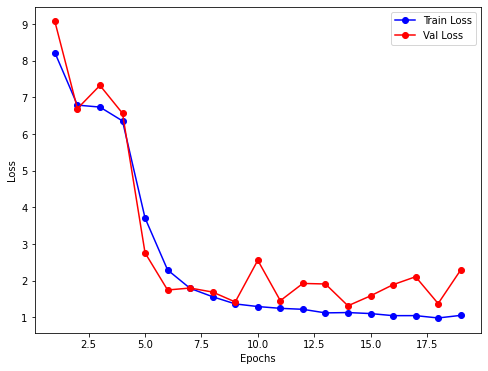

In [26]:
plot(len(metric), metric['Train Loss'], metric['Validation Loss'], "Epochs", "Loss", "Train Loss", "Val Loss")

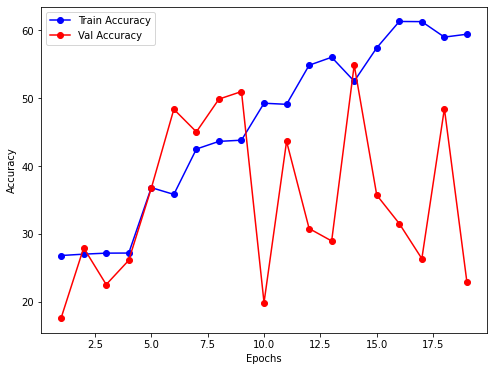

In [27]:
plot(len(metric), metric['Train Accuracy'], metric['Validation Accuracy'], "Epochs", "Accuracy", "Train Accuracy", "Val Accuracy")

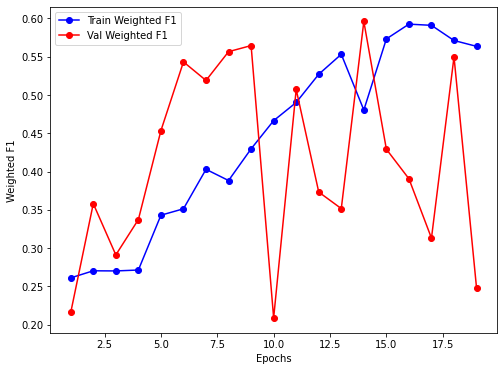

In [28]:
plot(len(metric), metric['Train Weighted F1'], metric['Validation Weighted F1'], "Epochs", "Weighted F1", "Train Weighted F1", "Val Weighted F1")

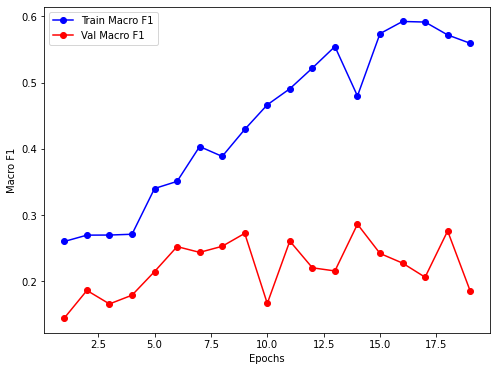

In [29]:
plot(len(metric), metric['Train Macro F1'], metric['Validation Macro F1'], "Epochs", "Macro F1", "Train Macro F1", "Val Macro F1")

In [1]:
import pandas as pd
results = pd.DataFrame(columns = ['Loss', 'Accuracy', 'Macro F1'], 
                   index = ['Sampled Train', 'Val','Test'])
results.loc['Sampled Train'] = [1.13, 52.46, 42.94]
results.loc['Val'] = [1.31, 54.83, 28.64]
results.loc['Test'] = [1.3133, 52.35, 24.68]
results

,Loss,Accuracy,Macro F1
Sampled Train,1.13,52.46,42.94
Val,1.31,54.83,28.64
Test,1.3133,52.35,24.68
